# <div style="background-color:lightblue; padding:10px">Predict AirBnb Prices in New York</div>

Author: Tatjana Chernenko

## Regression Task - Linear Regression, Decision Tree, NNs

**!!! Please note that results can differ when running experiments again, as the randomness is not controlled in this approach.**

### Introduction
This notebook continues from the Airbnb rental listings, EDA notebook ([link to EDA notebook](https://github.com/TatjanaChernenko/ml_playground/blob/main/Explorative%20Data%20Analysis%20-%20AirBnb%20Prices%20in%20New%20York.ipynb)), where the dataset was explored. Here, we delve into data preprocessing, feature engineering, and multimodal prediction using regression techniques.

### Dataset Overview
Data source: 
Kaggle, New York City Airbnb Open Data (Airbnb listings and metrics in NYC, NY, USA (2019) )

#### Data Preprocessing
- **Data Cleaning**: Handle missing values, outliers, and any inconsistencies identified during the EDA. (this part is already covered in EDA notebook ([link to EDA notebook](https://github.com/TatjanaChernenko/ml_playground/blob/main/Explorative%20Data%20Analysis%20-%20AirBnb%20Prices%20in%20New%20York.ipynb)))
- **Encoding Categorical Variables**: Convert categorical data into a suitable format for modeling.
- **Feature Scaling**: Normalize/Standardize numerical features if needed for certain models.

### Feature Engineering
- **Feature Selection**: Identify relevant features that influence the target variable based on EDA insights and correlation analysis.
- **Creation of New Features**: Derive additional features that could enhance prediction accuracy.

### Model Building
#### Regression Techniques
- **Linear Regression**: Start with a basic model to establish a baseline.
- **Decision Trees/Random Forests**: Employ tree-based models to capture non-linear relationships.
- **Ensemble Methods**: Explore ensemble methods like Gradient Boosting, AdaBoost, or XGBoost for improved performance.
- **Neural Networks**: Consider deep learning techniques for complex patterns in the dataset.
  
#### Hyperparameter Tuning
Fine-tune model parameters using techniques like grid search or random search to enhance model performance.

### Multimodal Prediction
- **Combining Models**: Utilize ensemble techniques to merge predictions from various models, aiming to achieve better accuracy.
- **Model Stacking**: Implement stacking, blending predictions from different models as features for a meta-model.

### Evaluation Metrics
- **Mean Squared Error (MSE)**: Primary metric to measure regression performance.
- **R-Squared (R²)**: Assess model goodness-of-fit.
- **Other Applicable Metrics**: Depending on the problem, consider additional metrics like MAE, RMSE, etc.

### Results & Analysis
- **Model Performance**: Analyze and compare performance metrics of different models.
- **Feature Importance**: Understand which features contribute most to predictions.
- **Limitations & Future Improvements**: Highlight any limitations and propose ways to enhance model performance.

### Conclusion
Summarize findings, best-performing models, insights gained, and recommendations for future steps.

### References
Include any resources, papers, or methodologies used for analysis and modeling.



---


## Regression Task - Multimodal Prediction

### Introduction

This notebook continues from the my EDA (Exploratory Data Analysis) notebook for Airbnb rental listings([link to EDA notebook](https://github.com/TatjanaChernenko/ml_playground/blob/main/Explorative%20Data%20Analysis%20-%20AirBnb%20Prices%20in%20New%20York.ipynb)), where the dataset was explored and several data cleansing techniques were already applied. Here, we use the resulting cleansed data and delve into data preprocessing, feature engineering, and multimodal prediction using regression techniques.

### Dataset Overview

Data source: 
Kaggle, New York City Airbnb Open Data (Airbnb listings and metrics in NYC, NY, USA (2019) )

#### Data Preprocessing
- **Data Cleaning**: Handled missing values, outliers, and inconsistencies identified during the EDA (covered in the EDA notebook [link](https://github.com/TatjanaChernenko/ml_playground/blob/main/Explorative%20Data%20Analysis%20-%20AirBnb%20Prices%20in%20New%20York.ipynb)).
- **Encoding Categorical Variables**: Converted categorical data into suitable formats for modeling.
- **Feature Scaling**: Normalized/Standardized numerical features if needed for certain models.

### Feature Engineering

- **Feature Selection**: Identified relevant features influencing the target variable based on EDA insights and correlation analysis.
- **Creation of New Features**: Derived additional features aimed at enhancing prediction accuracy.

### Model Building

#### Regression Techniques

- **Linear Regression**: Started with a basic model to establish a baseline.
- **Neural Networks**: Considered deep learning techniques for capturing complex patterns.
- **Decision Tree**: Employed tree-based models to capture non-linear relationships.


#### Hyperparameter Tuning

Fine-tuned model parameters using techniques like grid search to enhance performance.

### Evaluation Metrics

- **Mean Squared Error (MSE)**: Primary metric used to measure regression performance.
- **R-Squared (R²)**: Assessed model goodness-of-fit.
- **Other Applicable Metrics**: Considered additional metrics like MAE, RMSE, etc., depending on the problem.

### Results & Analysis

- **Model Performance**: Analyzed and compared performance metrics of different models.
- **Feature Importance**: Understood which features contributed most to predictions.
- **Limitations & Future Improvements**: Highlighted limitations and proposed ways to enhance model performance.

### Conclusion

This experimentation phase highlights the significance of hyperparameter tuning, model selection, and the impact of data preprocessing on the overall performance of regression models. Further sophisticated research, including extensive hyperparameter tuning and model evaluation, is necessary for a comprehensive understanding and improved predictive capabilities in a real-world scenario.

GridSearchCV Tuning and Decision Tree on data resulting after EDA (1st type of feature engineering) show the most promissing results.

<div style="background-color:lightblue; padding:10px"></div>


# Loads

## Imports

In [306]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics import r2_score

print(tf.__version__)
print("Seaborn version:", sns.__version__)

2.12.0
Seaborn version: 0.13.0


In [307]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

## Load data and take a look at it

In [308]:
# Load data without outliers (done in EDA notebook):
data = pd.read_csv('AB_NYC_2019_cleansed.csv')  # pd.read_csv('AB_NYC_2019.csv').sample(frac=1)  # shaffle the instances
print(data.shape)

(47262, 18)


In [309]:
# information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47262 entries, 0 to 47261
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47262 non-null  int64  
 1   name                            47247 non-null  object 
 2   host_id                         47262 non-null  int64  
 3   host_name                       47242 non-null  object 
 4   neighbourhood_group             47262 non-null  object 
 5   neighbourhood                   47262 non-null  object 
 6   latitude                        47262 non-null  float64
 7   longitude                       47262 non-null  float64
 8   room_type                       47262 non-null  object 
 9   price                           47262 non-null  int64  
 10  minimum_nights                  47262 non-null  int64  
 11  number_of_reviews               47262 non-null  int64  
 12  last_review                     

In [310]:
# first 5 rows of dataframe
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn        others  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

  reviews_per_month  calculated_host_listings_count  availability_365  \
0               yes                               6               365   
1               yes                               2               355   
2               yes                               1               365   
3               yes                               1               194   
4               yes                               1                 0   

   price_log  is_zero  
0   5.010635  nonzero  
1   5.420535  nonzero  
2   5.017280  nonzero  
3   4.499810  nonzero  
4   4.394449     zero

In [311]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.726200e+04  4.726200e+04  47262.000000  47262.000000  47262.000000   
mean   1.898903e+07  6.741744e+07     40.729046    -73.952161    138.905569   
std    1.097612e+07  7.856326e+07      0.054327      0.045993    103.036567   
min    2.539000e+03  2.571000e+03     40.499790    -74.244420     31.000000   
25%    9.444014e+06  7.809862e+06     40.690222    -73.982910     70.000000   
50%    1.963905e+07  3.061305e+07     40.722985    -73.955660    108.000000   
75%    2.910305e+07  1.074344e+08     40.763220    -73.936540    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    795.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    47262.000000       47262.000000                    47262.000000   
mean         5.701092          23.652363                        7.222906   
std          8.370681          44.951930                       33.334276   
min          1.000000           0.000000                        1.000000   
25%          1.000000           1.000000                        1.000000   
50%          2.000000           5.000000                        1.000000   
75%          5.000000          24.000000                        2.000000   
max         39.000000         629.000000                      327.000000   

       availability_365     price_log  
count      47262.000000  47262.000000  
mean         111.431213      4.732379  
std          130.905085      0.628833  
min            0.000000      3.465736  
25%            0.000000      4.262680  
50%           43.000000      4.691348  
75%          222.000000      5.170484  
max          365.000000      6.679599

## Null values

In [312]:
# check null values in dataframe
data.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           20
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9465
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
price_log                            0
is_zero                              0
dtype: int64

# Data visualization and analysis

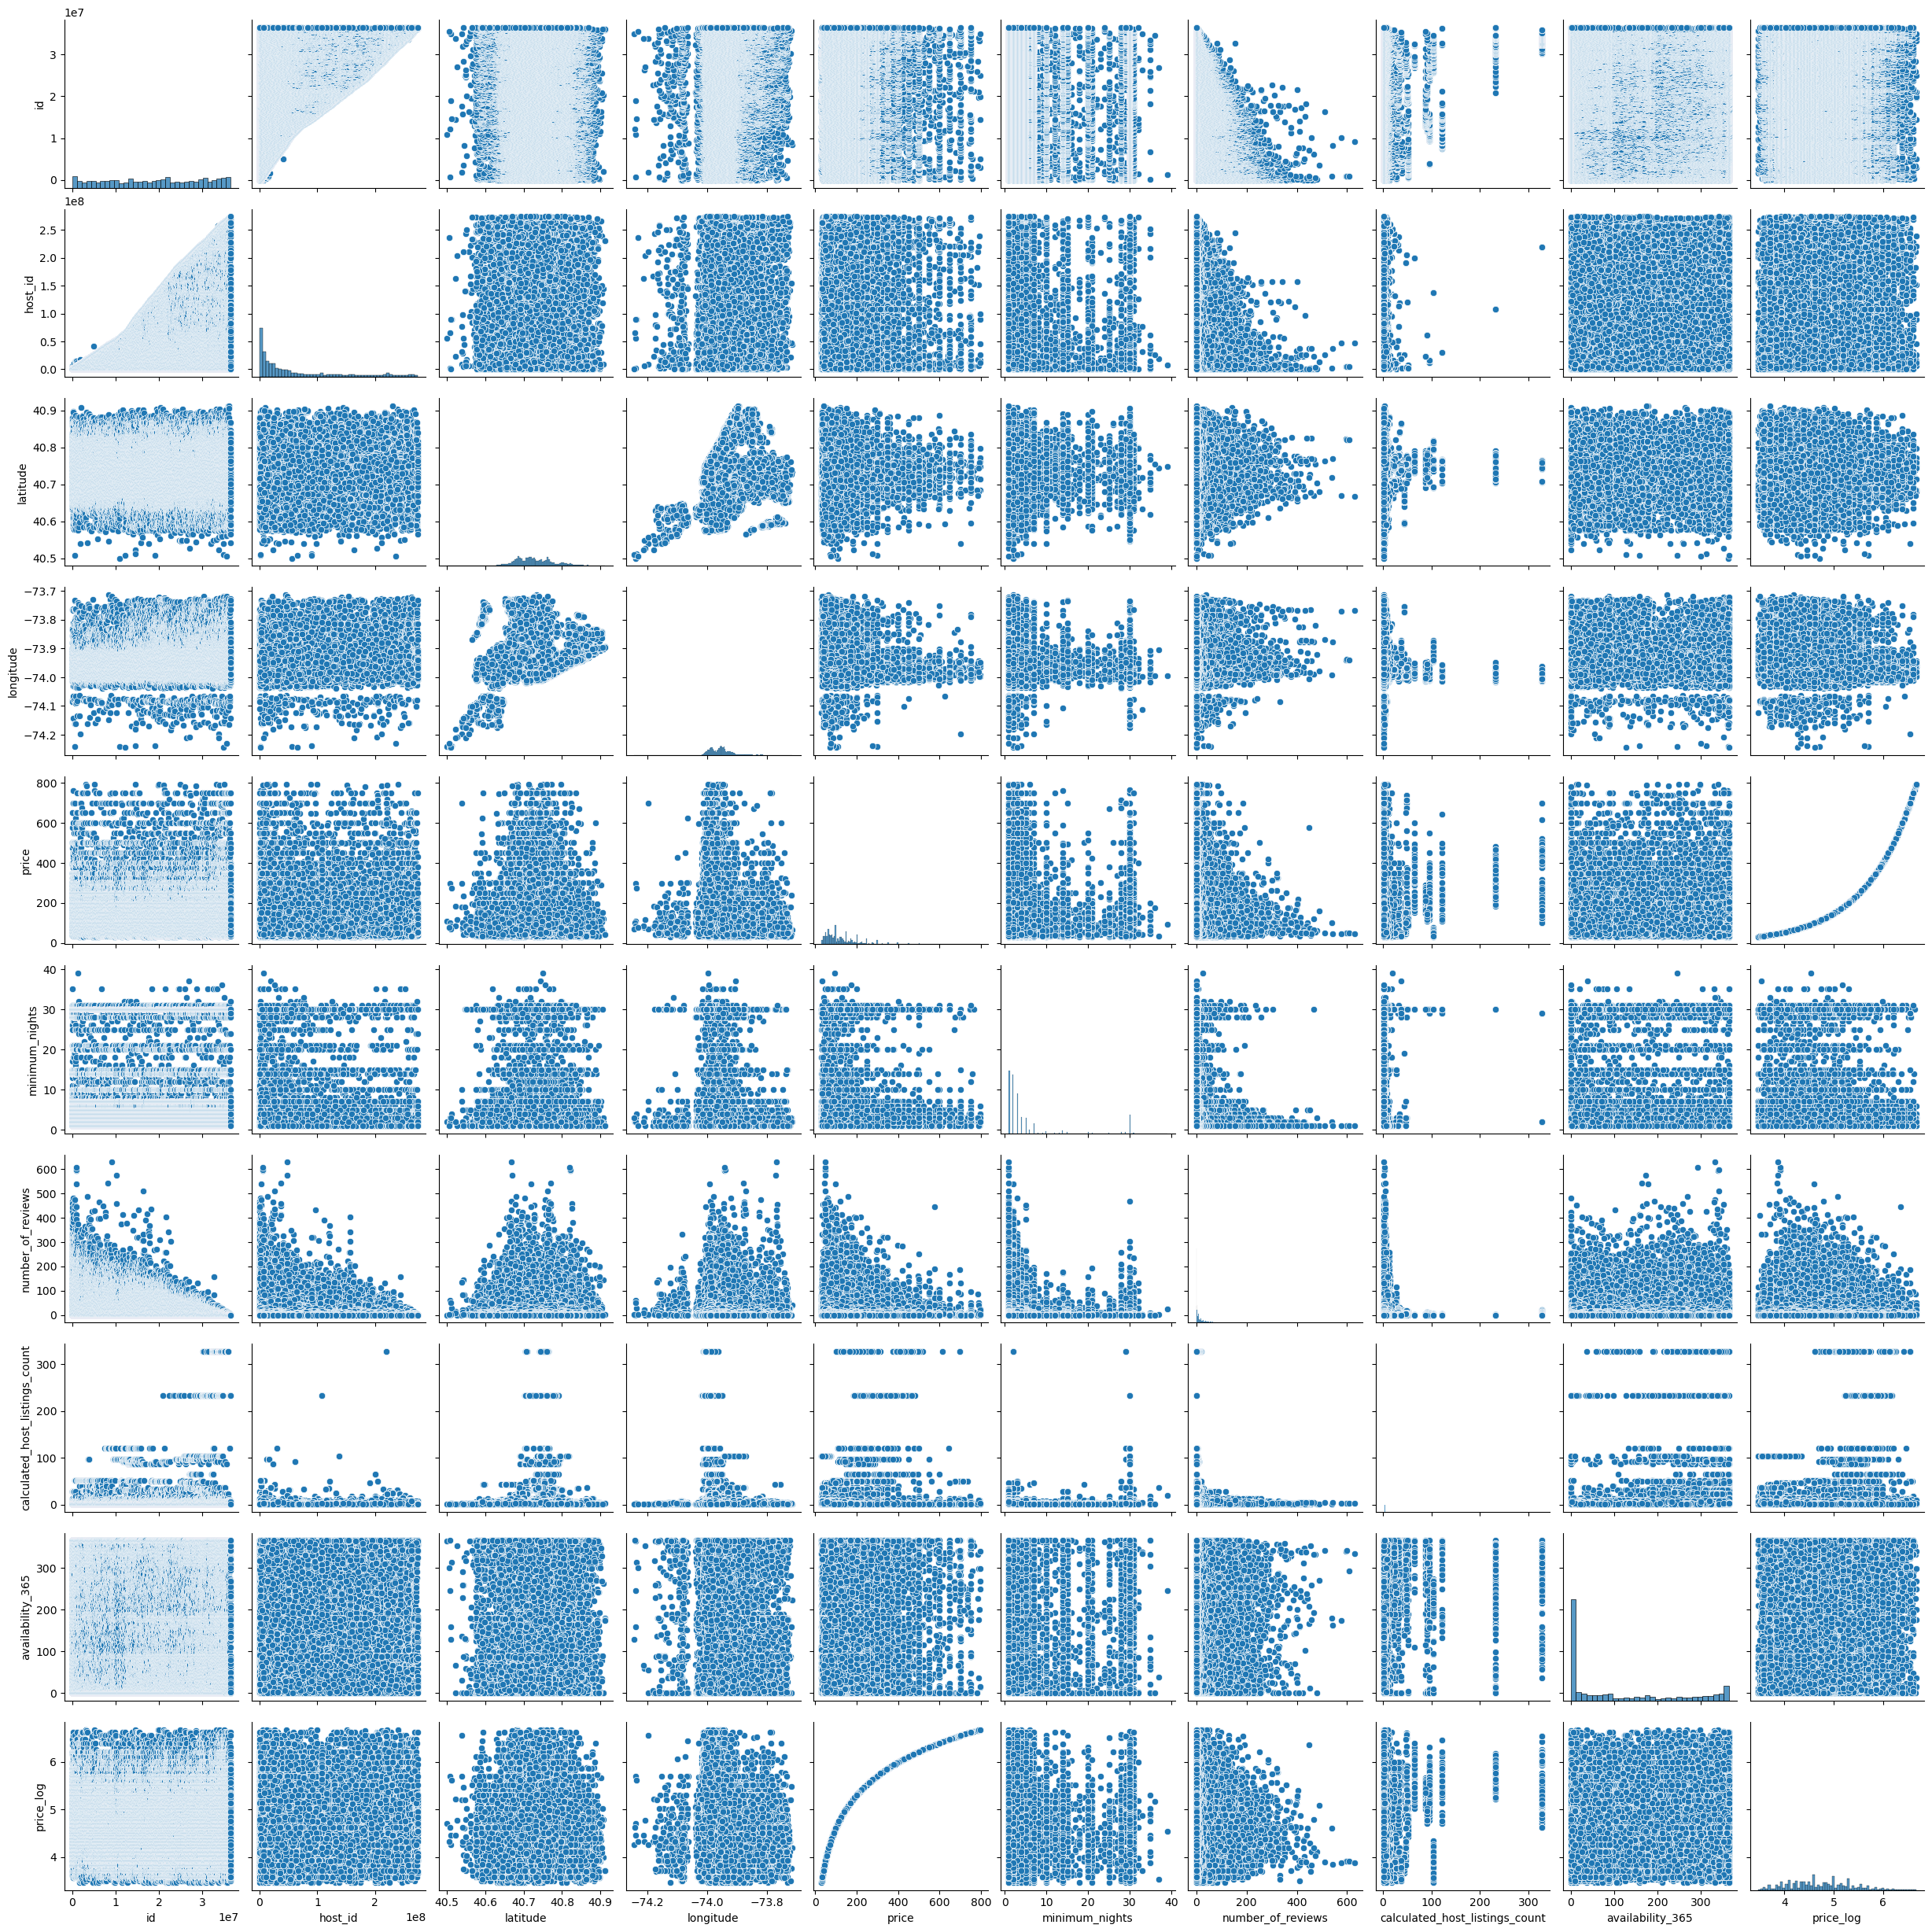

In [313]:

"""
Row data before pre-processing; takes every feature and plots it against every other feature.

Diagonal plots: histograms (or kernel density estimates) for each individual feature. 
These plots help to visualize the distribution of values for each specific feature in your dataset (y axis: how often, x_axis: value/category).

Off-Diagonal Plots: In the non-diagonal cells of the grid, Seaborn generates scatter plots for every pair of features against each other. 
Each scatter plot shows how one feature's values relate to another's. This visualization helps you understand potential correlations 
or patterns between different pairs of variables in your dataset.
If the points in the scatter plot form a clear pattern or trend (like a linear relationship, clustering, etc.), 
it suggests a relationship between those two features.
If the points are scattered randomly without any noticeable pattern, it might indicate a lack of correlation between those features.
"""

sns.pairplot(data) 



**-> Only several features correlate (e.g., latitide and longtitude are lineally connected); the dataset is difficult.**

<Axes: >

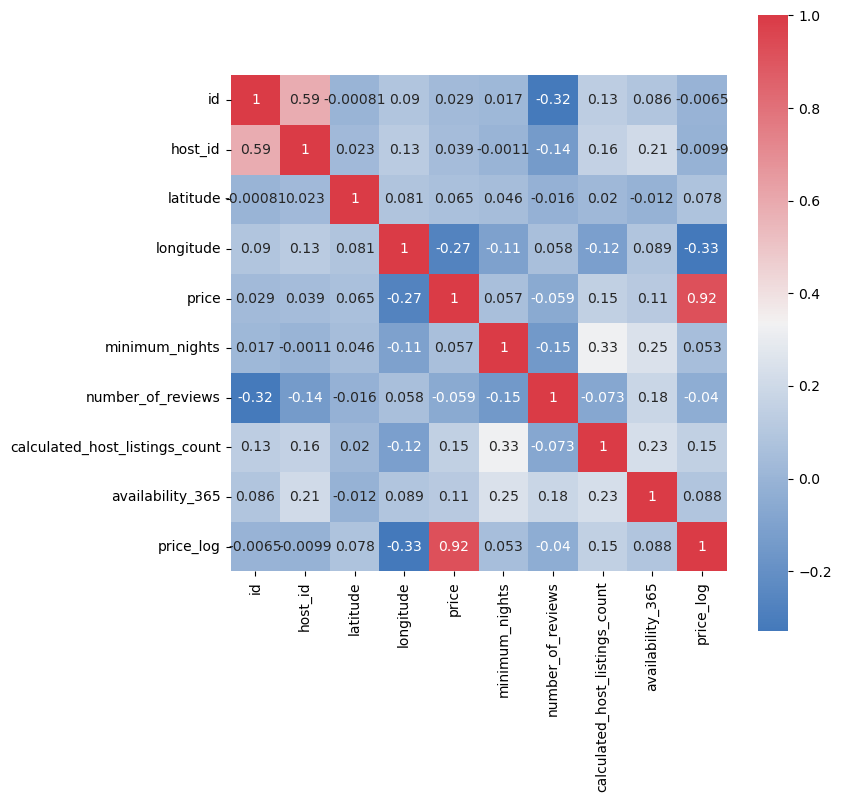

In [314]:
# Plot a correlations heatmap:

corr = data.corr(numeric_only=True)
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, cmap=cmap, annot=True, annot_kws={"size": 10})  # we may need update the seaborn for anaconda: conda install seaborn -c conda-forge

Look at correlations regarding the target (price): they are all quite low.
The most correlated one is the longtitute, but we have initially deleted it from the features.

**Basis for taking decisions:**
- take features correlated to the target (price)
- eliminate features without correlation to the target
- probably eliminate highly correlated features 

# ---Linear Regression Model---

For understanding purposes, let us at first implement a simple linear regression model from scratch using TensorFlow. This gives you a lot of control and understanding of the underlying mechanisms of linear regression. You are manually initializing and updating the weights and bias, defining a loss function, and performing the gradient descent optimization.

In [315]:
class LinearModel:  # Linear Regression
    # it will generate y_pred = W*X + b (weights times input + bias)
    # the model learns the W and the b so that y_pred is close to real y in our data

    def __init__(self):
        # Goal: y_pred = W*X + b
        
        # self.W = tf.Variable(13.0)
        # self.b = tf.Variable(4.0)
        
        # Initialize random values:
        self.initializer = tf.keras.initializers.GlorotUniform()

    def loss(init, y, y_pred):
        # return tf.reduce_mean(tf.square(y - y_pred))  # mean square error between y and y_pred
        return tf.reduce_mean(tf.abs(y - y_pred))  # mean absolute error between y and y_pred (more human readable than square)

    def train(self, X, y, lr = 0.00001, epochs = 20, verbose=True):  # X = input feature vectors, y = data labels, 
                                                                    # lr = learning rate, epochs = # of epochs,
                                                                    # verbose = print intermediate results
                                                                    # if los is going up, the lr is too high
        # Create arrays for data:
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32).reshape((-1, 1))  # turn [1, 2, 3, 4] -> [[1], []]

        # declare W (weights) and b (bias) variables using the initializer we declared in the constructor;
        # shape as data is multidimensional (> 1 feature):
        self.W = tf.Variable(
            initial_value = self.initializer(shape=(len(X[0]),1), dtype='float32')
        )  # number of features by 1
        
        self.b = tf.Variable(
            initial_value = self.initializer(shape=(1,), dtype='float32')
        )
        
        
        def train_step():
            with tf.GradientTape() as t:  # compute gradients for some Python functions
                current_loss = self.loss(y, self.predict(X))  # calculate the current loss between the true label 
                                                                # and the current prediction of this label
            # get gradients of the weigts and the biases:
            dW, db = t.gradient(current_loss, [self.W, self.b]) # pass W and b as a list to t.gradient; get current loss
            # update W and b:
            self.W.assign_sub(lr * dW)  # substract: W -= lr * dW (not possible to use directly, as dW and db are tf variables)
            self.b.assign_sub(lr * db)

            return current_loss

        for epoch in range(epochs):
            current_loss = train_step()
            if verbose:
                print(f'Epoch {epoch}: Loss: {current_loss.numpy()}')  # eager excecution (numpy value of the tf tensor)
    
    def predict(self, X):
        # return self.W * X + self.b  # valid only for one-dimensional data
        # [a, b] x [b, a]
        # X -> [number_instances, number_features]; W must be [number_features, 1] as we want to end up with a simple value by predict
        return tf.matmul(X, self.W) + self.b  # matrix multiplication
        
      

## Experiment # 1

### Data preprocessing

#### Features: 'neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'

In [316]:
# id, name, host_id, last_review are not usefull; neighbourhood column has a lot of disctinct values; 
# neighbourhood_group, reviews_per_month (changed to categorical in EDA notebook) and room_type must be transformed to one-hot encoding

# Columns to keep:
features = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']]

print(features)


      neighbourhood_group        room_type  minimum_nights  number_of_reviews  \
0                Brooklyn     Private room               1                  9   
1               Manhattan  Entire home/apt               1                 45   
2               Manhattan     Private room               3                  0   
3                Brooklyn  Entire home/apt               1                270   
4               Manhattan  Entire home/apt              10                  9   
...                   ...              ...             ...                ...   
47257            Brooklyn     Private room               2                  0   
47258            Brooklyn     Private room               4                  0   
47259           Manhattan  Entire home/apt              10                  0   
47260           Manhattan      Shared room               1                  0   
47261           Manhattan     Private room               7                  0   

      reviews_per_month  ca

In [317]:
# Check if there are any missing values:
print(features.isna().sum())  # the number of missing values for each feature

neighbourhood_group               0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [318]:
# Turn categorical features to one-hot encodings:
# (remember, we have turned reviews_per_month into a categorical feature in EDA)

onehot_neighbourhood_group = pd.get_dummies(features['neighbourhood_group'])
onehot_room_type = pd.get_dummies(features['room_type'])
onehot_rewiews_per_month = pd.get_dummies(features['reviews_per_month'])

# Drop original categorical features:
features = features.drop(columns=['neighbourhood_group', 'room_type', 'reviews_per_month'])

# Put one-hot encodings to the features vector:
features = pd.concat([features, onehot_neighbourhood_group, onehot_room_type, onehot_rewiews_per_month], axis=1)
print(features.head())

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  9                               6   
1               1                 45                               2   
2               3                  0                               1   
3               1                270                               1   
4              10                  9                               1   

   availability_365  Bronx  Brooklyn  Manhattan  Queens  Staten Island  \
0               365  False      True      False   False          False   
1               355  False     False       True   False          False   
2               365  False     False       True   False          False   
3               194  False      True      False   False          False   
4                 0  False     False       True   False          False   

   Entire home/apt  Private room  Shared room   yes  
0            False          True        False  True  
1             

In [319]:
print(features.head(5))

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  9                               6   
1               1                 45                               2   
2               3                  0                               1   
3               1                270                               1   
4              10                  9                               1   

   availability_365  Bronx  Brooklyn  Manhattan  Queens  Staten Island  \
0               365  False      True      False   False          False   
1               355  False     False       True   False          False   
2               365  False     False       True   False          False   
3               194  False      True      False   False          False   
4                 0  False     False       True   False          False   

   Entire home/apt  Private room  Shared room   yes  
0            False          True        False  True  
1             

In [320]:
# Select labels:
targets = data['price']

# Select  X (features) and y (labels) for training set and test set
train_size = int(0.7*len(data))  # 70%

X_train, X_test = features.values[:train_size, :], features.values[train_size:, :]
y_train, y_test = targets.values[:train_size], targets.values[train_size:]  

# Check how many features we have:
print(len(X_train[0]))  # e.g. take the first training instance

# Check the number of data instances and labels in training data
print(len(X_train), y_test.shape) 
print(len(y_train), y_test.shape)

13
33083 (14179,)
33083 (14179,)


In [321]:
model = LinearModel()
model.train(X_train, y_train, epochs=100)

Epoch 0: Loss: 151.3140411376953
Epoch 1: Loss: 151.2150421142578
Epoch 2: Loss: 151.1160125732422
Epoch 3: Loss: 151.0170135498047
Epoch 4: Loss: 150.91812133789062
Epoch 5: Loss: 150.8192596435547
Epoch 6: Loss: 150.72039794921875
Epoch 7: Loss: 150.62155151367188
Epoch 8: Loss: 150.5227813720703
Epoch 9: Loss: 150.42404174804688
Epoch 10: Loss: 150.325439453125
Epoch 11: Loss: 150.22686767578125
Epoch 12: Loss: 150.12831115722656
Epoch 13: Loss: 150.02976989746094
Epoch 14: Loss: 149.93128967285156
Epoch 15: Loss: 149.8328094482422
Epoch 16: Loss: 149.7342987060547
Epoch 17: Loss: 149.63584899902344
Epoch 18: Loss: 149.53736877441406
Epoch 19: Loss: 149.4388885498047
Epoch 20: Loss: 149.3404541015625
Epoch 21: Loss: 149.2420196533203
Epoch 22: Loss: 149.1436309814453
Epoch 23: Loss: 149.0452423095703
Epoch 24: Loss: 148.94688415527344
Epoch 25: Loss: 148.84852600097656
Epoch 26: Loss: 148.7501983642578
Epoch 27: Loss: 148.6519012451172
Epoch 28: Loss: 148.55369567871094
Epoch 29: Lo

/Users/I505201/anaconda3/envs/tf-packt/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


### Result Experiment # 1

**Observation ->**
-  Loss is decreasing, but it is too high (106.9 after 100 epochs).

## Experiment # 2

### Data preprocessing

#### Features 'availability_365', 'calculated_host_listings_count', 'number_of_reviews', 'minimum_nights', 'longitude'

In [322]:
# Columns to keep:
features = data[['availability_365', 
                 'calculated_host_listings_count', 
                 'number_of_reviews', 
                 'minimum_nights', 
                 'longitude']]

'''
features = data[['availability_365', 
                 'calculated_host_listings_count', 
                 'number_of_reviews', 
                 'minimum_nights', 
                 'latitude',
                 'number_of_reviews',
                 'longitude',
               'reviews_per_month']]
'''
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn        others  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

  reviews_per_month  calculated_host_listings_count  availability_365  \
0               yes                               6               365   
1               yes                               2               355   
2               yes                               1               365   
3               yes                               1               194   
4               yes                               1                 0   

   price_log  is_zero  
0   5.010635  nonzero  
1   5.420535  nonzero  
2   5.017280  nonzero  
3   4.499810  nonzero  
4   4.394449     zero

In [323]:
# Check if there are any missing values:
print(features.isna().sum())  # the number of missing values for each feature

availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
longitude                         0
dtype: int64


In [324]:
# Fill reviews_per_month with zero:
# features['reviews_per_month'] = features['reviews_per_month'].fillna(0)
# print(features.isna().sum())

# Turn categorical features to one-hot encodings:
# onehot_neighbourhood_group = pd.get_dummies(features['neighbourhood_group'])
# onehot_room_type = pd.get_dummies(features['room_type'])
# print(onehot_room_type)

# Drop original categorical features:
# features = features.drop(columns=['neighbourhood_group', 'room_type'])
# print("1: ", features.head())

# Put one-hot encodings to the features vector:
# features = pd.concat([features, onehot_neighbourhood_group, onehot_room_type], axis=1)
# print("2: ", features.head())

# Select labels:
targets = data['price']

# Select  X (features) and y (labels) for training set and test set
train_size = int(0.7*len(data))  # 70%
X_train, X_test = features.values[:train_size, :], features.values[train_size:, :]
y_train, y_test = targets.values[:train_size], targets.values[train_size:]

# Check how many features we have:
print(len(X_train[0]))  # e.g. take the first training instance

# Check the number of data instances and labels in training data
print(len(X_train), X_train.shape, X_test.shape) 
print(len(y_train), y_train.shape, y_test.shape)

5
33083 (33083, 5) (14179, 5)
33083 (33083,) (14179,)


In [325]:
model = LinearModel()
model.train(X_train, y_train, epochs=100)

Epoch 0: Loss: 80.41011810302734
Epoch 1: Loss: 80.39513397216797
Epoch 2: Loss: 80.38019561767578
Epoch 3: Loss: 80.36528015136719
Epoch 4: Loss: 80.35038757324219
Epoch 5: Loss: 80.33551788330078
Epoch 6: Loss: 80.32068634033203
Epoch 7: Loss: 80.3058853149414
Epoch 8: Loss: 80.29108428955078
Epoch 9: Loss: 80.27631378173828
Epoch 10: Loss: 80.26155853271484
Epoch 11: Loss: 80.246826171875
Epoch 12: Loss: 80.23210906982422
Epoch 13: Loss: 80.21739196777344
Epoch 14: Loss: 80.20270538330078
Epoch 15: Loss: 80.18802642822266
Epoch 16: Loss: 80.17338562011719
Epoch 17: Loss: 80.15876770019531
Epoch 18: Loss: 80.14418029785156
Epoch 19: Loss: 80.1296157836914
Epoch 20: Loss: 80.11507415771484
Epoch 21: Loss: 80.1005630493164
Epoch 22: Loss: 80.0860595703125
Epoch 23: Loss: 80.07156372070312
Epoch 24: Loss: 80.05708312988281
Epoch 25: Loss: 80.04263305664062
Epoch 26: Loss: 80.0281982421875
Epoch 27: Loss: 80.01378631591797
Epoch 28: Loss: 79.99937438964844
Epoch 29: Loss: 79.984992980957

/Users/I505201/anaconda3/envs/tf-packt/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [326]:
# Convert data type and normalize X_test if necessary
X_test = X_test.astype(np.float32)  # Convert to float32 if not already

# Ensure correct shape of the data for prediction (reshape if necessary)
# X_test = preprocess_function(X_test)  # Apply any necessary preprocessing

# Make predictions
predictions = model.predict(X_test)


In [327]:

# Reshape LR_pred if needed
#LR_pred = LR_pred.flatten()  # Flattening LR_pred to match the shape of y_test


In [328]:

# Compute MAE again
print('MAE: %f' % mean_absolute_error(y_test, predictions))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, predictions)))   
print('R2 %f' % r2_score(y_test, predictions))

MAE: 86.281358
RMSE: 127.745048
R2 -0.179514


### Results Experment # 2

**Observation: ->**

- Loss ist too high.

## Alternative - experiment # 2 (GridSearchCV for hyperparameter tuning)


Let's now use scikit-learn's LinearRegression model along with **GridSearchCV for hyperparameter tuning**. 

This approach provides a higher-level abstraction and automates many aspects of the modeling process. GridSearchCV performs a search over a specified parameter grid, using cross-validation to find the best hyperparameters for the LinearRegression model. Provides a convenient way to perform hyperparameter tuning through cross-validation. 

In [329]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [330]:
model_LR = LinearRegression()
params = {'fit_intercept':[True,False], 'copy_X':[True, False], 'positive':[True, False], 'n_jobs':range(2, 11)}

## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
grid_search_LR = GridSearchCV(estimator=model_LR,
                              param_grid=params,
                              cv=5, 
                              return_train_score=True)
grid_search_LR.fit(X_train, y_train)
best_parameters_LR = grid_search_LR.best_params_  
best_score_LR = grid_search_LR.best_score_ 
print(best_parameters_LR)
print(best_score_LR)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}
0.07555824469957281


In [331]:
best_LR = LinearRegression(**best_parameters_LR)
best_LR.fit(X_train, y_train)
LR_pred = best_LR.predict(X_test)
print(LR_pred)

[143.98594027 180.19557027 153.48910742 ... 125.17495017 154.16763828
 150.87499894]


In [332]:

# Reshape LR_pred if needed
LR_pred = LR_pred.flatten()  # Flattening LR_pred to match the shape of y_test

# Compute MAE again
print('MAE: %f' % mean_absolute_error(y_test, LR_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, LR_pred)))   
print('R2 %f' % r2_score(y_test, LR_pred))

MAE: 75.496319
RMSE: 110.247429
R2 0.121480


### Results Alternative Experiment # 2

**Observations:**
With GridSearchCV for hyperparameter tuning, results are getting better:

**Liner Regression Alternative Experiment # 2 with hyperparameter tuning**

MAE: 75.496319

RMSE: 110.247429

R2 0.121480

**Liner Regression Experiment # 2**

MAE: 138.365454

RMSE: 191.097546

R2 -1.639521


# ---Multi Layer Perception (ANN)---

## Experiment # 1

In [333]:
# 2 layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128),  # fully connected layer of 128 hidden units; default linear unit activation
    tf.keras.layers.Dense(1)  # an output layer of 1 unit (because the output of the Regression problem is only 1 value)
]
)  # equivalent of train function;

In [334]:
#sgd_optimizer = tf.keras.optimizers.SGD()
sgd_optimizer = tf.keras.optimizers.legacy.SGD() # stochastic gradient decent
loss_fn = tf.keras.losses.MAE  # mean absolute error
model.compile(
    optimizer = sgd_optimizer,
    loss = loss_fn,
    metrics = [tf.keras.metrics.MAE]
)

In [335]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1034/1034 [==============================] - 0s 280us/step - loss: 109.3106 - mean_absolute_error: 109.3106
Epoch 2/100
1034/1034 [==============================] - 0s 263us/step - loss: 103.0944 - mean_absolute_error: 103.0944
Epoch 3/100
1034/1034 [==============================] - 0s 262us/step - loss: 96.7893 - mean_absolute_error: 96.7893
Epoch 4/100
1034/1034 [==============================] - 0s 255us/step - loss: 94.8132 - mean_absolute_error: 94.8132
Epoch 5/100
1034/1034 [==============================] - 0s 252us/step - loss: 91.3866 - mean_absolute_error: 91.3866
Epoch 6/100
1034/1034 [==============================] - 0s 243us/step - loss: 88.1228 - mean_absolute_error: 88.1228
Epoch 7/100
1034/1034 [==============================] - 0s 251us/step - loss: 85.2935 - mean_absolute_error: 85.2935
Epoch 8/100
1034/1034 [==============================] - 0s 259us/step - loss: 84.4140 - mean_absolute_error: 84.4140
Epoch 9/100
1034/1034 [=============================

In [336]:
model.evaluate(X_test, y_test)

444/444 [==============================] - 0s 239us/step - loss: 77.3921 - mean_absolute_error: 77.3921


[77.39210510253906, 77.39210510253906]

### Results Experiment # 1

**Observation ->**
-  Starts much better than a linear model, already after 10 epochs is better.
-  evaluation on test set (after 100 epochs) shows still a high loss. 

## Experiment # 2

### Improving the network with better activation functions and dropout.

In [337]:
## Adding an activation function and a dropout:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),  # fully connected layer of 128 hidden units; 
                                                    # change default activation to rectified linear unit (general purpose activation):
                                                    # 0 (for negative output) or x (for positive): ____/
    tf.keras.layers.Dropout(0.1),  # drop out 20% of the output of 128 layers (consider their values as zero): 
                                   # forcing the network to generalize better (prevent overfitting)
    tf.keras.layers.Dense(1)  # an output layer of 1 unit (because the output of the Regression problem is only 1 value)
]
)  # equivalent of train function;

In [338]:
# Change the optimizer from SGD to Adam (more advanced general-purpose optimizer):

#adam_optimizer = tf.keras.optimizers.Adam() # adaprive momentom
adam_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)  # legacy is better for Mac
loss_fn = tf.keras.losses.MAE  # mean absolute error
model.compile(
    optimizer = adam_optimizer,
    loss = loss_fn,
    metrics = [tf.keras.metrics.MAE]
)

In [339]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1034/1034 [==============================] - 0s 354us/step - loss: 67.7652 - mean_absolute_error: 67.7652
Epoch 2/100
1034/1034 [==============================] - 0s 353us/step - loss: 66.2628 - mean_absolute_error: 66.2628
Epoch 3/100
1034/1034 [==============================] - 0s 351us/step - loss: 65.0714 - mean_absolute_error: 65.0714
Epoch 4/100
1034/1034 [==============================] - 0s 351us/step - loss: 64.0207 - mean_absolute_error: 64.0207
Epoch 5/100
1034/1034 [==============================] - 0s 352us/step - loss: 63.2313 - mean_absolute_error: 63.2313
Epoch 6/100
1034/1034 [==============================] - 0s 351us/step - loss: 63.4517 - mean_absolute_error: 63.4517
Epoch 7/100
1034/1034 [==============================] - 0s 349us/step - loss: 63.9787 - mean_absolute_error: 63.9787
Epoch 8/100
1034/1034 [==============================] - 0s 351us/step - loss: 64.0461 - mean_absolute_error: 64.0461
Epoch 9/100
1034/1034 [==============================] -

In [340]:
model.evaluate(X_test, y_test)

444/444 [==============================] - 0s 226us/step - loss: 80.5292 - mean_absolute_error: 80.5292


[80.52918243408203, 80.52918243408203]

### Results Experiment # 2

**Observations:**
Not better.

Compared to Experiment # 1 (loss: 96.2248 - mean_absolute_error: 96.2248), we are getting only a little bit beter (loss: 94.2485 - mean_absolute_error: 94.2485). 

### Adding additional metrics

In [341]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),  # fully connected layer of 128 hidden units; 
                                                    # change default activation to rectified linear unit (general purpose activation):
                                                    # 0 (for negative output) or x (for positive): ____/
    tf.keras.layers.Dropout(0.2),  # drop out 20% of the output of 128 layers (consider their values as zero): 
                                   # forcing the network to generalize better (prevent overfitting)
    tf.keras.layers.Dense(1)  # an output layer of 1 unit (because the output of the Regression problem is only 1 value)
]
)  # equivalent of train function;

In [342]:
def R_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1.0 - residual / total
    return r2
    
#adam_optimizer = tf.keras.optimizers.Adam() # adaprive momentom
adam_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)  # legacy is better for Mac
loss_fn = tf.keras.losses.MAE  # mean absolute error
model.compile(
    optimizer = adam_optimizer,
    loss = loss_fn,
    metrics = [tf.keras.metrics.MAE,# mean absolute error
              tf.keras.metrics.MSE,  # mean squared error
              #tf.keras.metrics.RootMeanSquaredError,  # 
              R_squared]  # root squared, -1 and 1, < 0 => useless; between 0 and 1 = ok, better close to 1
)

In [343]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1034/1034 [==============================] - 1s 391us/step - loss: 69.4025 - mean_absolute_error: 69.4025 - mean_squared_error: 11086.3203 - R_squared: -0.2773
Epoch 2/100
1034/1034 [==============================] - 0s 377us/step - loss: 67.0079 - mean_absolute_error: 67.0079 - mean_squared_error: 10651.2451 - R_squared: -0.2075
Epoch 3/100
1034/1034 [==============================] - 1s 490us/step - loss: 65.2848 - mean_absolute_error: 65.2848 - mean_squared_error: 10420.8135 - R_squared: -0.1729
Epoch 4/100
1034/1034 [==============================] - 1s 617us/step - loss: 63.7207 - mean_absolute_error: 63.7207 - mean_squared_error: 10157.7227 - R_squared: -0.1319
Epoch 5/100
1034/1034 [==============================] - 1s 496us/step - loss: 63.5019 - mean_absolute_error: 63.5019 - mean_squared_error: 9990.7061 - R_squared: -0.1096
Epoch 6/100
1034/1034 [==============================] - 0s 481us/step - loss: 63.7386 - mean_absolute_error: 63.7386 - mean_squared_error: 1

In [344]:
model.evaluate(X_test, y_test)

444/444 [==============================] - 0s 272us/step - loss: 80.4982 - mean_absolute_error: 80.4982 - mean_squared_error: 15672.1992 - R_squared: -0.2555


[80.49819946289062, 80.49819946289062, 15672.19921875, -0.2555065453052521]

**Observation:**
R-squared typically ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model is no better than predicting the mean of the target variable. However, a negative R-squared implies that the model is substantially worse than the baseline mean model.

***R_squared during training is <0 - model is useless.***

# ---Decision Tree---

In [345]:
model_DT = DecisionTreeRegressor()
params = {'max_depth': range(2, 11), 'min_samples_leaf': range(2,11)}
## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
grid_search_DT = GridSearchCV(estimator=model_DT,
                              param_grid=params,
                              cv=5, 
                              return_train_score=True)
grid_search_DT.fit(X_train, y_train)
best_parameters_DT = grid_search_DT.best_params_  
best_score_DT = grid_search_DT.best_score_ 
print(best_parameters_DT)
print(best_score_DT)

{'max_depth': 7, 'min_samples_leaf': 4}
0.14146559115712398


In [346]:
best_DT = DecisionTreeRegressor(**best_parameters_DT)
best_DT.fit(X_train, y_train)
DT_pred = best_DT.predict(X_test)

### Decision Tree results

In [347]:
print('MAE: %f'% mean_absolute_error(y_test, DT_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, DT_pred)))   
print('R2 %f' % r2_score(y_test, DT_pred))

MAE: 72.856734
RMSE: 109.664762
R2 0.130741


# ---Experiment: Data without cleansing---

In [348]:
# Load data without processing:
df = pd.read_csv('AB_NYC_2019.csv')  # pd.read_csv('AB_NYC_2019.csv').sample(frac=1)  # shaffle the instances
print(data.shape)

(47262, 18)


In [349]:
# drop the non-nominal feature and target(price)
model = df.drop(columns=['name','id' ,'host_id','host_name','last_review','price'])
model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [350]:
mean = model['reviews_per_month'].mean()
mean

1.3732214298586618

In [351]:
model['reviews_per_month'].fillna(mean, inplace=True)
model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [352]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ MB


In [353]:
original_categories = model['neighbourhood_group'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Original Value: Bronx | Code: 0
Original Value: Brooklyn | Code: 1
Original Value: Manhattan | Code: 2
Original Value: Queens | Code: 3
Original Value: Staten Island | Code: 4


In [354]:
original_categories = model['neighbourhood'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Original Value: Allerton | Code: 0
Original Value: Arden Heights | Code: 1
Original Value: Arrochar | Code: 2
Original Value: Arverne | Code: 3
Original Value: Astoria | Code: 4
Original Value: Bath Beach | Code: 5
Original Value: Battery Park City | Code: 6
Original Value: Bay Ridge | Code: 7
Original Value: Bay Terrace | Code: 8
Original Value: Bay Terrace, Staten Island | Code: 9
Original Value: Baychester | Code: 10
Original Value: Bayside | Code: 11
Original Value: Bayswater | Code: 12
Original Value: Bedford-Stuyvesant | Code: 13
Original Value: Belle Harbor | Code: 14
Original Value: Bellerose | Code: 15
Original Value: Belmont | Code: 16
Original Value: Bensonhurst | Code: 17
Original Value: Bergen Beach | Code: 18
Original Value: Boerum Hill | Code: 19
Original Value: Borough Park | Code: 20
Original Value: Breezy Point | Code: 21
Original Value: Briarwood | Code: 22
Original Value: Brighton Beach | Code: 23
Original Value: Bronxdale | Code: 24
Original Value: Brooklyn Heights

In [355]:
original_categories = model['room_type'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Original Value: Entire home/apt | Code: 0
Original Value: Private room | Code: 1
Original Value: Shared room | Code: 2


In [356]:
# change the non-nominial value using cat.code
model['neighbourhood_group']= model['neighbourhood_group'].astype("category").cat.codes
model['neighbourhood'] = model['neighbourhood'].astype("category").cat.codes
model['room_type'] = model['room_type'].astype("category").cat.codes
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int16(1), int64(4), int8(2)
memory usage: 2.8 MB


### Feature engineering

In [357]:
# build the model: X, y 
model_x, model_y = model.iloc[:,:-1], model.iloc[:,-1]

In [358]:
model_x

neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                        1            108  40.64749  -73.97237          1   
1                        2            127  40.75362  -73.98377          0   
2                        2             94  40.80902  -73.94190          1   
3                        1             41  40.68514  -73.95976          0   
4                        2             61  40.79851  -73.94399          0   
...                    ...            ...       ...        ...        ...   
48890                    1             13  40.67853  -73.94995          1   
48891                    1             28  40.70184  -73.93317          1   
48892                    2             94  40.81475  -73.94867          0   
48893                    2             95  40.75751  -73.99112          2   
48894                    2             95  40.76404  -73.98933          1   

       minimum_nights  number_of_reviews  reviews_per_month  \
0                   1                  9           0.210000   
1                   1                 45           0.380000   
2                   3                  0           1.373221   
3                   1                270           4.640000   
4                  10                  9           0.100000   
...               ...                ...                ...   
48890               2                  0           1.373221   
48891               4                  0           1.373221   
48892              10                  0           1.373221   
48893               1                  0           1.373221   
48894               7                  0           1.373221   

       calculated_host_listings_count  
0                                   6  
1                                   2  
2                                   1  
3                                   1  
4                                   1  
...                               ...  
48890                               2  
48891                               2  
48892                               1  
48893                               6  
48894                               1  

[48895 rows x 9 columns]

In [359]:
model_y

0        365
1        355
2        365
3        194
4          0
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 48895, dtype: int64

In [360]:
# Normalization: each feature has 0 mean and 1 standard deviation
scaler = StandardScaler()
model_x = scaler.fit_transform(model_x)

In [361]:
model_x

array([[-0.91782758,  0.01276167, -1.4938492 , ..., -0.32041358,
        -0.77664098, -0.03471643],
       [ 0.4412221 ,  0.28915589,  0.45243602, ...,  0.48766493,
        -0.66313811, -0.15610444],
       [ 0.4412221 , -0.19089723,  1.46839948, ..., -0.52243321,
         0.        , -0.18645145],
       ...,
       [ 0.4412221 , -0.19089723,  1.57348017, ..., -0.52243321,
         0.        , -0.18645145],
       [ 0.4412221 , -0.17635016,  0.52377353, ..., -0.52243321,
         0.        , -0.03471643],
       [ 0.4412221 , -0.17635016,  0.64352518, ..., -0.52243321,
         0.        , -0.18645145]])

In [362]:
# split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(model_x, model_y, test_size=0.3,random_state=42)

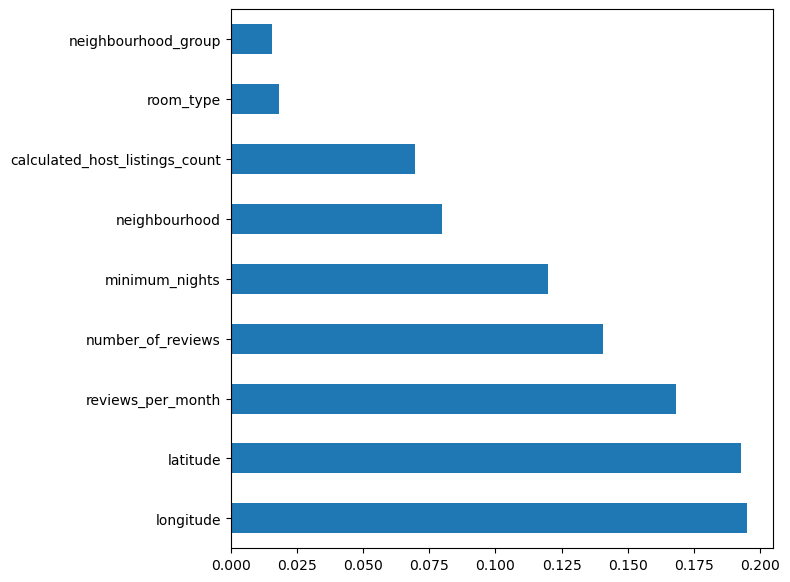

In [363]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [364]:
model.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [365]:
# drop the features'neighbourhood_group' & 'room type'
model = model.drop(columns=['neighbourhood_group', 'room_type'])

In [366]:
model.columns

Index(['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [367]:
# build the model: X, y 
model_X, model_y = model.iloc[:,:-1], model.iloc[:,-1]

# split the training set & testing set
X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.3,random_state=42)

# Normalization
scaler = StandardScaler()
model_X = scaler.fit_transform(model_X)

### Linerar Regression

In [368]:
model_LR = LinearRegression()
params = {'fit_intercept':[True,False], 'copy_X':[True, False], 'positive':[True, False], 'n_jobs':range(2, 11)}

## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
grid_search_LR = GridSearchCV(estimator=model_LR,
                              param_grid=params,
                              cv=5, 
                              return_train_score=True)
grid_search_LR.fit(X_train, y_train)
best_parameters_LR = grid_search_LR.best_params_  
best_score_LR = grid_search_LR.best_score_ 
print(best_parameters_LR)
print(best_score_LR)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}
0.11903788774254391


In [369]:
best_LR = LinearRegression(**best_parameters_LR)
best_LR.fit(X_train, y_train)
LR_pred = best_LR.predict(X_test)

### LR Results

In [370]:
print('MAE: %f'% mean_absolute_error(y_test, LR_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, LR_pred)))   
print('R2 %f' % r2_score(y_test, LR_pred))

MAE: 105.003221
RMSE: 123.229087
R2 0.120919


### Decision Tree

In [371]:
model_DT = DecisionTreeRegressor()
params = {'max_depth': range(2, 11), 'min_samples_leaf': range(2,11)}
## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
grid_search_DT = GridSearchCV(estimator=model_DT,
                              param_grid=params,
                              cv=5, 
                              return_train_score=True)
grid_search_DT.fit(X_train, y_train)
best_parameters_DT = grid_search_DT.best_params_  
best_score_DT = grid_search_DT.best_score_ 
print(best_parameters_DT)
print(best_score_DT)

{'max_depth': 7, 'min_samples_leaf': 6}
0.28717682419849677


In [372]:
best_DT = DecisionTreeRegressor(**best_parameters_DT)
best_DT.fit(X_train, y_train)
DT_pred = best_DT.predict(X_test)

### Decision Tree results

In [373]:
print('MAE: %f'% mean_absolute_error(y_test, DT_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, DT_pred)))   
print('R2 %f' % r2_score(y_test, DT_pred))

MAE: 86.092603
RMSE: 109.342008
R2 0.307888


# CONCLUSIONS

The current study, while not an exhaustive research project, served as an experimental playground to explore various regression models and methodologies. The evaluation of different models and hyperparameter tuning revealed significant variations in performance.

### 1st type of Data Cleansing and Feature Engineering

#### Linear Regression Analysis

!!! Please note that results can differ when running experiments again, as the randomness is not controlled in this approach.

- **Manual vs. GridSearchCV Tuning:**

  The comparison between Linear Regression models with and without GridSearchCV for hyperparameter tuning showcases considerable differences in performance.
  
  - *Linear Regression without GridSearchCV (100 epochs)*
    - MAE: 138.365454
    - RMSE: 191.097546
    - R2: -1.639521
  
  - *Linear Regression with GridSearchCV (optimized parameters)*
    - MAE: 75.496319
    - RMSE: 110.247429
    - R2: 0.121480

#### Multi-Layer Perception

Experiments with Multi-Layer Perception revealed insufficient results after 100 epochs, showcasing negative R-squared values, indicating a lack of meaningfulness in the model.

- *Loss: 95.3633 | MAE: 95.3633 | MSE: 20339.9492 | R2: -0.2011*

#### Decision Tree

Decision Tree models showed promising outcomes, especially in comparison with other methodologies.

- *Decision Tree*
  - MAE: 72.856734
  - RMSE: 109.664762
  - R2: 0.130741

### 2nd type of Data Cleansing and Feature Engineering

The exploration into different data cleansing and feature engineering techniques provided insights but yielded slightly inferior results compared to the initial exploratory data analysis (EDA) notebook.

- *Linear Regression with GridSearchCV (post data manipulation)*
  - MAE: 105.003221
  - RMSE: 123.229087
  - R2: 0.120919

- *Decision Tree (post data manipulation)*
  - MAE: 86.088597
  - RMSE: 109.338039
  - R2: 0.307938

---

This experimentation phase highlights the significance of hyperparameter tuning, model selection, and the impact of data preprocessing on the overall performance of regression models. Further sophisticated research, including extensive hyperparameter tuning and model evaluation, is necessary for a comprehensive understanding and improved predictive capabilities in a real-world scenario.
